In [30]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [13]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size().unstack().fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [20]:
c[c.Superman > c.Batman]
len(c)

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [21]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size().unstack().fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [22]:
c[c.Superman < c.Batman]
len(c)

46

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

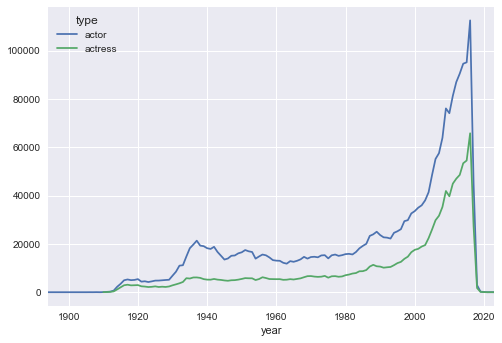

In [34]:
c = cast
c.groupby(['year', 'type']).size().unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

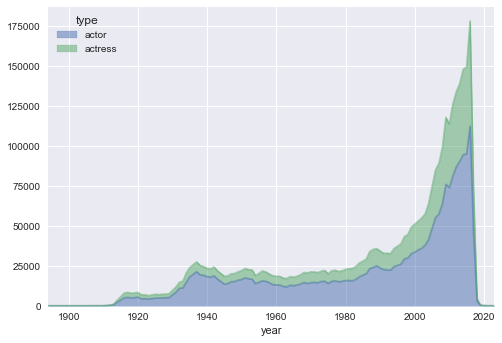

In [51]:
c = cast
c.groupby(['year', 'type']).size().unstack().plot(kind='area', alpha=0.5)

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

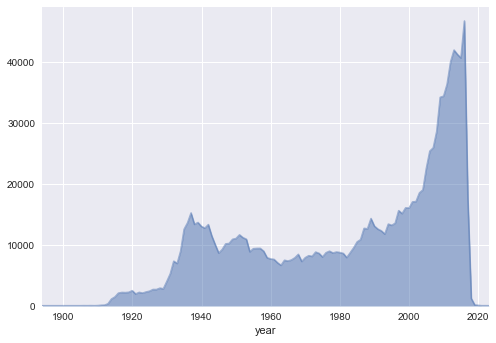

In [50]:
c = cast
c = c.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor - c.actress).plot(kind='area', alpha=0.5)

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

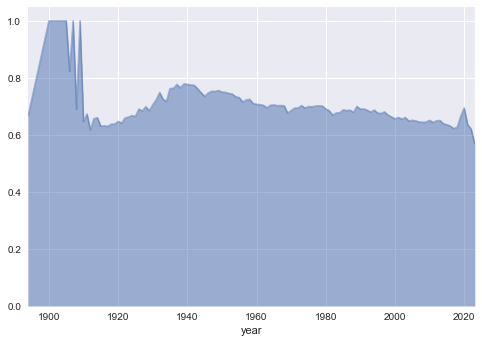

In [59]:
c = cast
c = c.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor/(c.actor+c.actress)).plot(kind='area', alpha=0.5)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

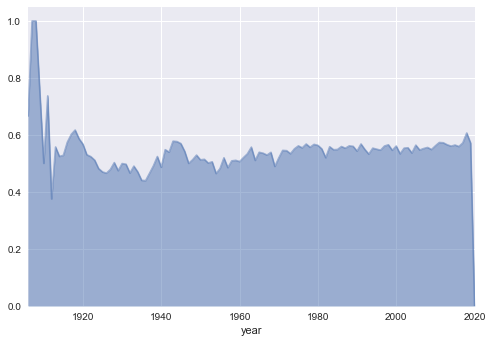

In [73]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size().unstack().fillna(0)
(c.actor / (c.actor+c.actress)).plot(kind='area', alpha=0.5)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [128]:
c = cast
c = c[(c.n>=1) & (c.n<=3)]
c = c.groupby(['year', 'type', 'n']).size().unstack('type').fillna(0)
c.head()

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    0.0      1.0
1907 1.0    1.0      0.0
     2.0    1.0      0.0

In [135]:
frac_actor = (c.actor / (c.actor + c.actress)).unstack()
frac_actor.head()

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.0
1907,1.000000,1.000000,1.0
1908,1.000000,1.000000,1.0
1909,1.000000,NaN,NaN
1910,0.200000,0.500000,1.0


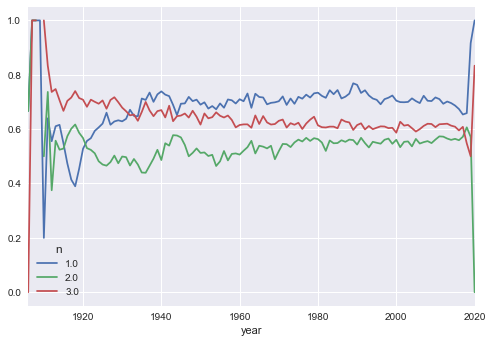

In [133]:
frac_actor.plot()